In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('malazan_visualisation_dataset.csv')
df

,Character,Army,Power_Level,Magic_Aptitude,Combat_Skill,Morale
0,Anomander Rake,Tiste Andii,98,95,97,88
1,Quick Ben,Bridgeburners,85,99,70,82
2,Karsa Orlong,Teblor,92,10,95,90
3,Tavore Paran,Malazan 14th,70,40,55,70
4,Icarium Lifestealer,Wanderer,99,100,88,85
5,Whiskeyjack,Bridgeburners,88,5,90,95
6,Fiddler,Bridgeburners,76,15,75,80
7,Apsalar,Assassin,82,60,80,78
8,Onos T'oolan,T'lan Imass,90,30,93,92
9,Bryce Sorm,Seti,67,5,60,65


In [3]:
sns.set_theme(style='darkgrid')

<AxesSubplot:xlabel='Combat_Skill', ylabel='Power_Level'>

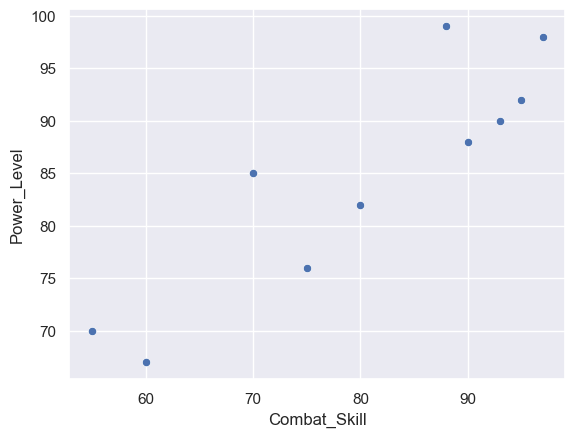

In [4]:
sns.scatterplot(data=df, x='Combat_Skill', y='Power_Level')

Activity: Commander Power vs Magic

Text(0.5, 1.0, 'Combat Skill vs Magic Aptitude (by Army)')

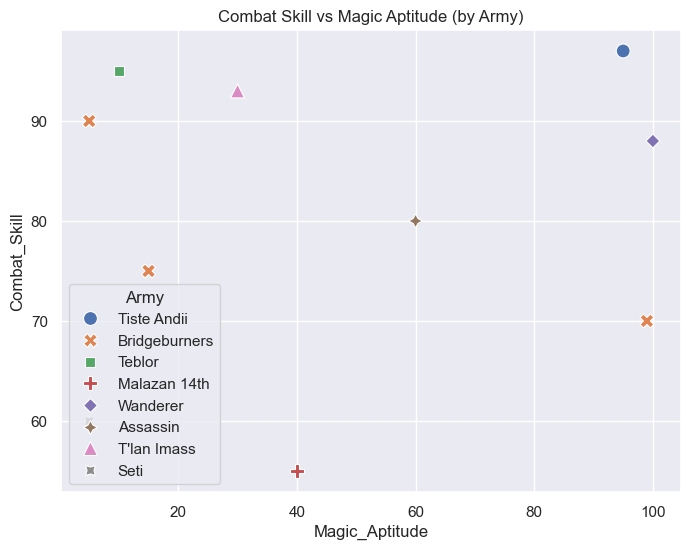

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Magic_Aptitude", y="Combat_Skill",
    hue="Army", style="Army", s=100
)
plt.title("Combat Skill vs Magic Aptitude (by Army)")

<AxesSubplot:xlabel='Magic_Aptitude', ylabel='Count'>

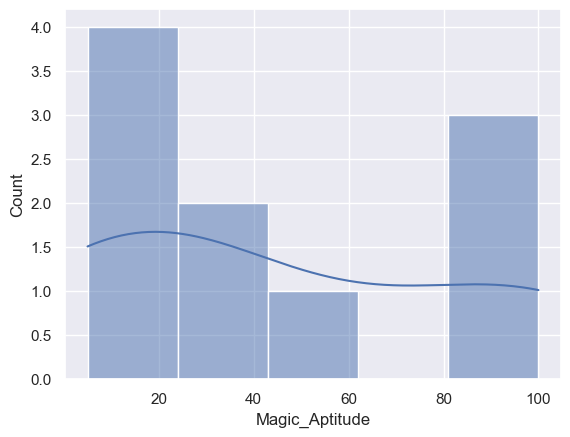

In [7]:
sns.histplot(df['Magic_Aptitude'], kde=True)

<AxesSubplot:xlabel='Morale', ylabel='Density'>

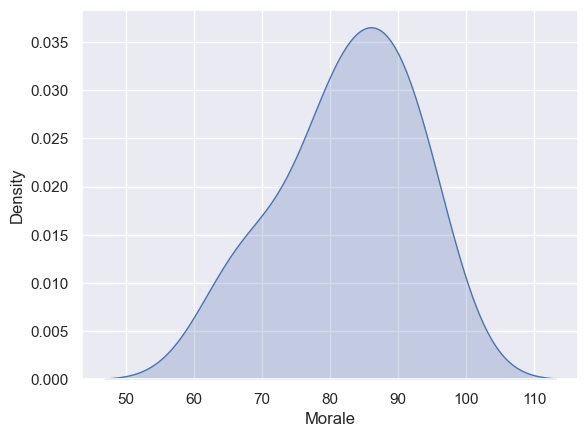

In [10]:
sns.kdeplot(df['Morale'], shade=True)

Activity: Morale Analysis

,Character,Army,Morale
2,Karsa Orlong,Teblor,90
5,Whiskeyjack,Bridgeburners,95
8,Onos T'oolan,T'lan Imass,92


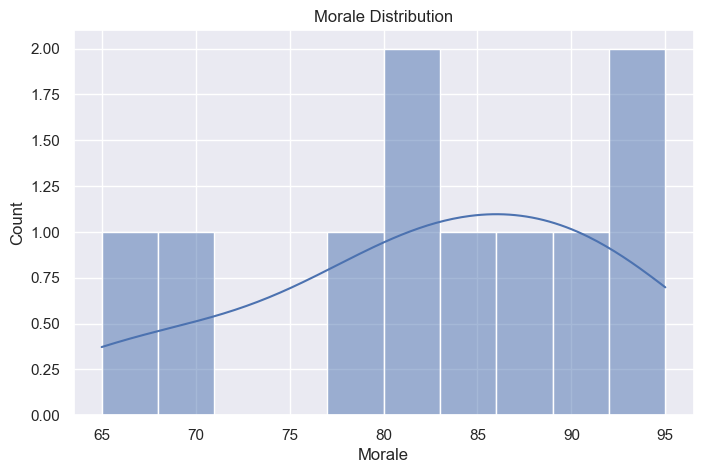

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["Morale"], bins=10, kde=True)
plt.title("Morale Distribution")

high_thr = df["Morale"].quantile(0.75)
df[df["Morale"] >= high_thr][["Character","Army","Morale"]]

<AxesSubplot:xlabel='Combat_Skill'>

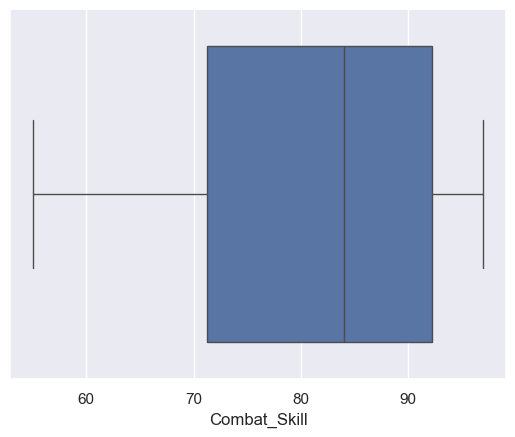

In [16]:
sns.boxplot(data=df, x='Combat_Skill')

Activity: Combat Skill by Army

,median
Army,
Tiste Andii,97.0
Teblor,95.0
T'lan Imass,93.0
Wanderer,88.0
Assassin,80.0
Bridgeburners,75.0
Seti,60.0
Malazan 14th,55.0


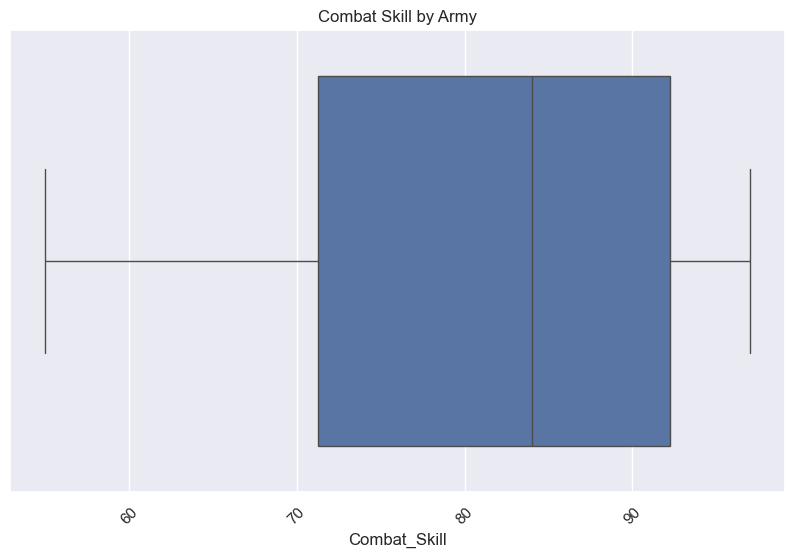

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Combat_Skill"
)
plt.xticks(rotation=45)
plt.title("Combat Skill by Army")

df.groupby("Army")["Combat_Skill"].agg(["median"]).sort_values("median", ascending=False)

In [21]:
df["Combat_Skill"].var()

221.78888888888886

<AxesSubplot:>

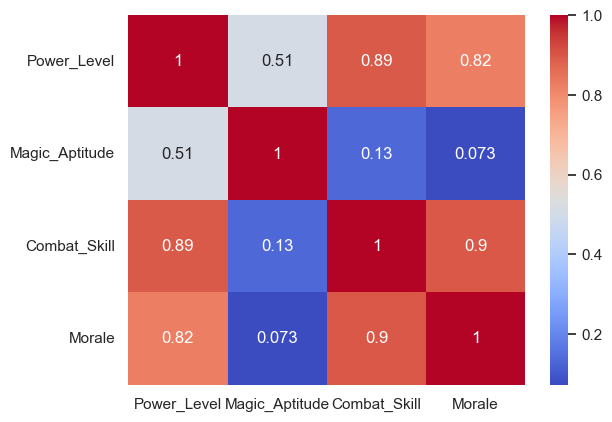

In [24]:
sns.heatmap(df[['Power_Level','Magic_Aptitude','Combat_Skill','Morale']].corr(), annot=True, 
            cmap='coolwarm')

Activity: Correlations

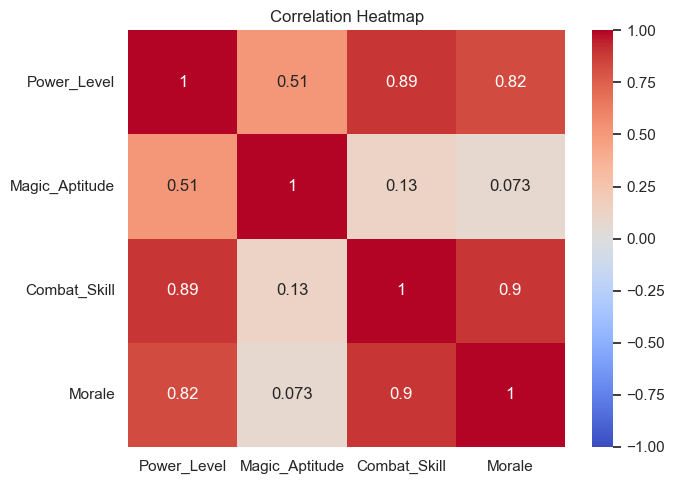

[('Combat_Skill', 'Morale', 0.8977523146976352),
 ('Combat_Skill', 'Power_Level', 0.8923521173496002),
 ('Morale', 'Power_Level', 0.8249035697240794)]

In [26]:
numeric_cols = ['Power_Level','Magic_Aptitude','Combat_Skill','Morale']
corr = df[numeric_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")

# Top correlation pairs
pairs = []
for a in numeric_cols:
    for b in numeric_cols:
        if a < b:
            pairs.append((a, b, corr.loc[a,b]))

sorted(pairs, key=lambda x: abs(x[2]), reverse=True)[:3]

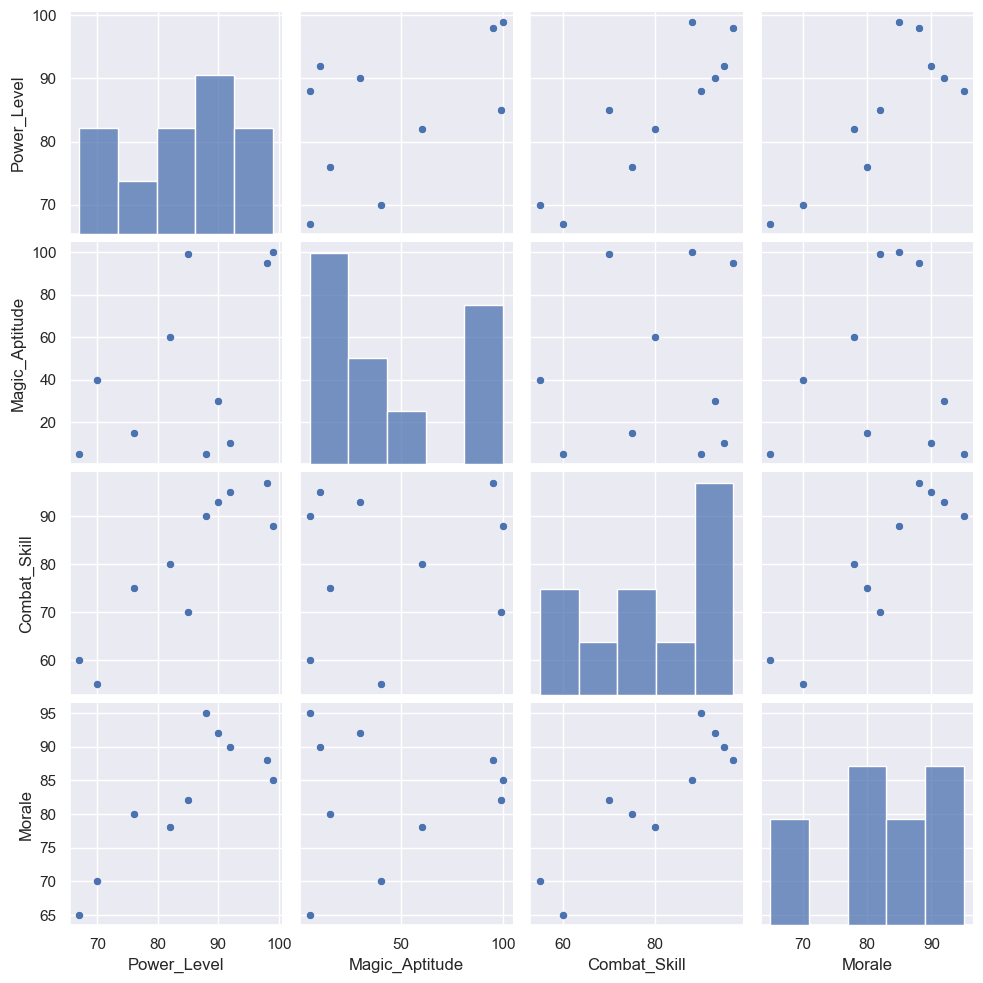

In [28]:
sns.pairplot(df)

Activity: Pairplot Analysis

Text(0.5, 1.02, 'Pairwise Relationships (Inspect for Outliers)')

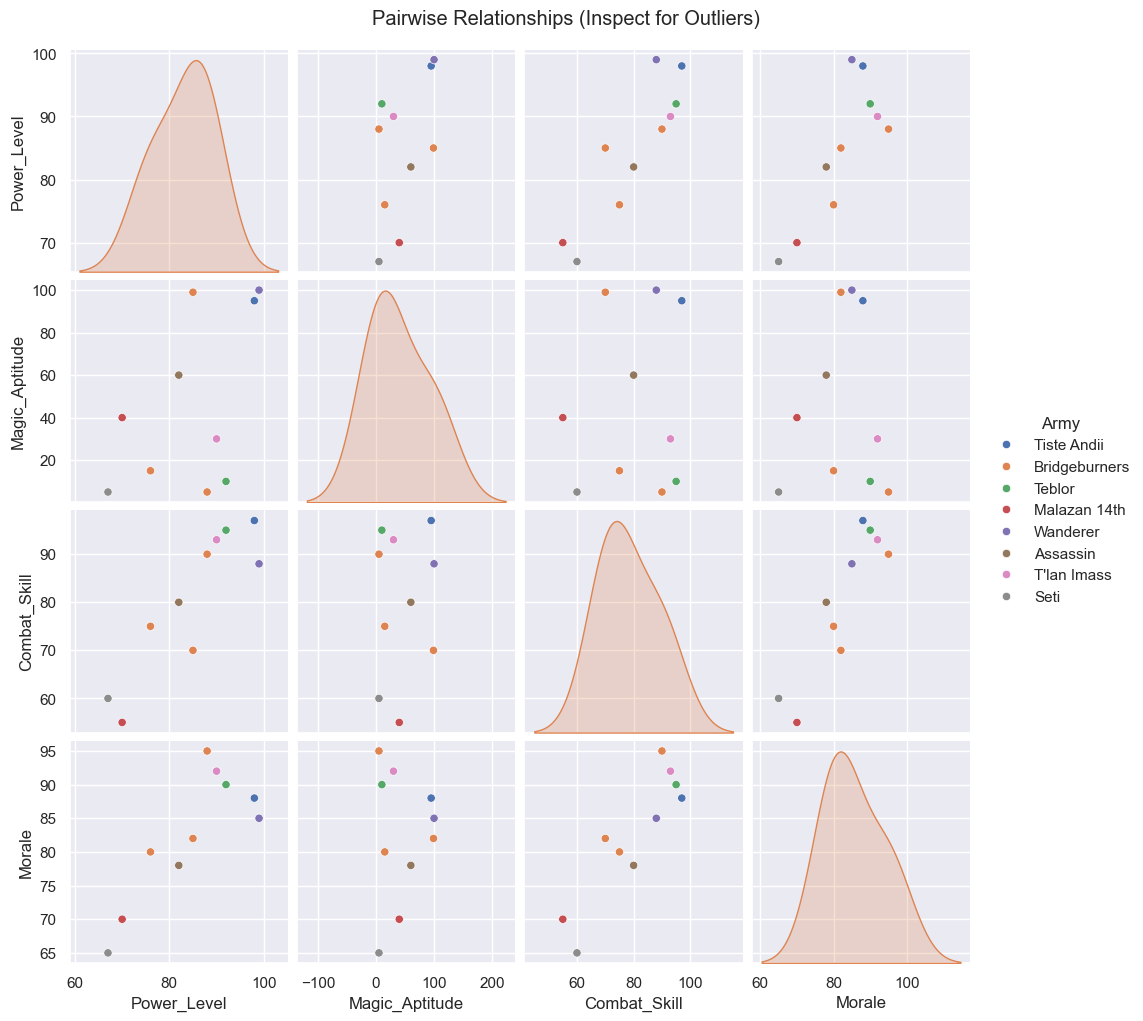

In [29]:
sns.pairplot(df[numeric_cols + ["Army"]], hue="Army")
plt.suptitle("Pairwise Relationships (Inspect for Outliers)", y=1.02)

In [31]:
Z = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
outliers = df[(np.abs(Z) > 2.5).any(axis=1)][["Character"] + numeric_cols]
outliers

,Character,Power_Level,Magic_Aptitude,Combat_Skill,Morale


<AxesSubplot:xlabel='Army', ylabel='Magic_Aptitude'>

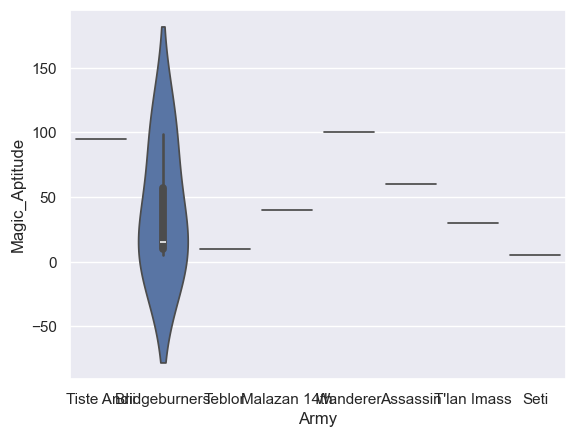

In [35]:
sns.violinplot(data=df, x='Army', y='Magic_Aptitude')

Army
Bridgeburners    39.0
Assassin          NaN
Malazan 14th      NaN
Seti              NaN
T'lan Imass       NaN
Teblor            NaN
Tiste Andii       NaN
Wanderer          NaN
Name: Power_Level, dtype: float64

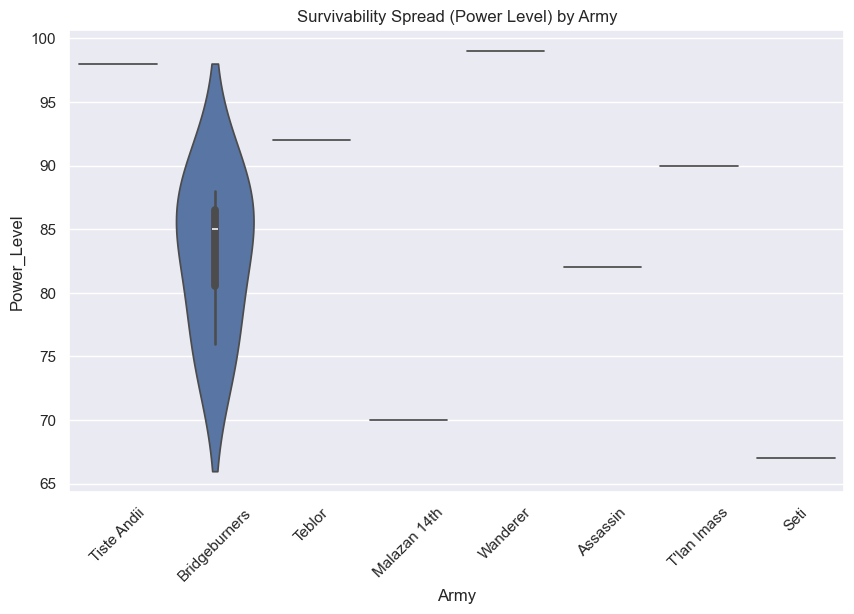

In [38]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df,
    x="Army", y="Power_Level"
)
plt.xticks(rotation=45)
plt.title("Survivability Spread (Power Level) by Army")

df.groupby("Army")["Power_Level"].var().sort_values(ascending=False)

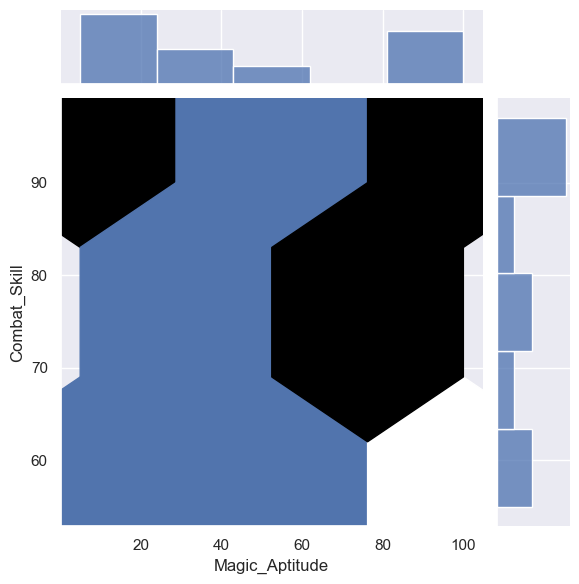

In [41]:
sns.jointplot(data=df, x='Magic_Aptitude', y='Combat_Skill', kind='hex')

Activity: Strategy vs Magic

0.5093710894897807

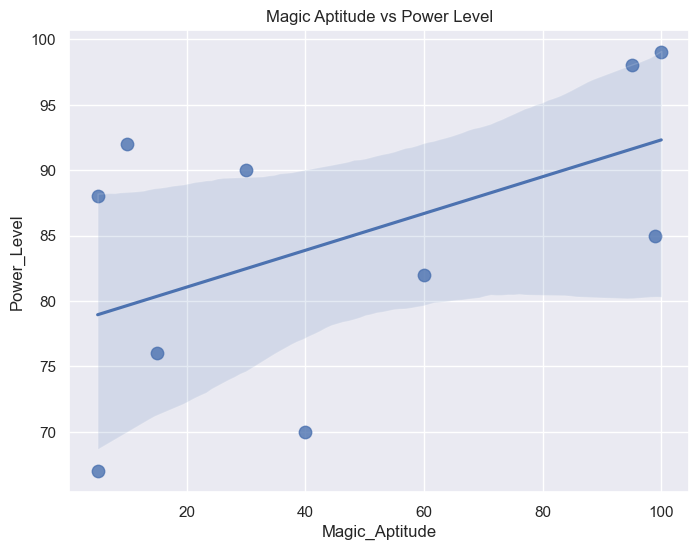

In [45]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="Magic_Aptitude", y="Power_Level",
    scatter_kws={"s":80}
)
plt.title("Magic Aptitude vs Power Level")

df["Magic_Aptitude"].corr(df["Power_Level"])

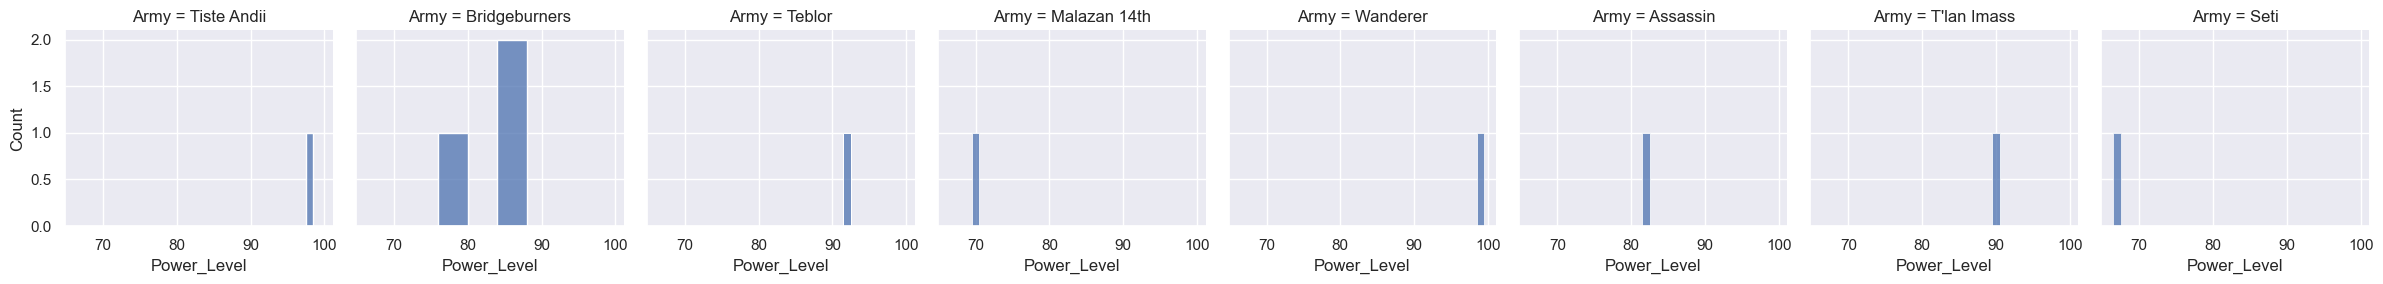

In [48]:
g = sns.FacetGrid(df, col='Army')
g.map(sns.histplot, 'Power_Level')

Activity: Army Histograms

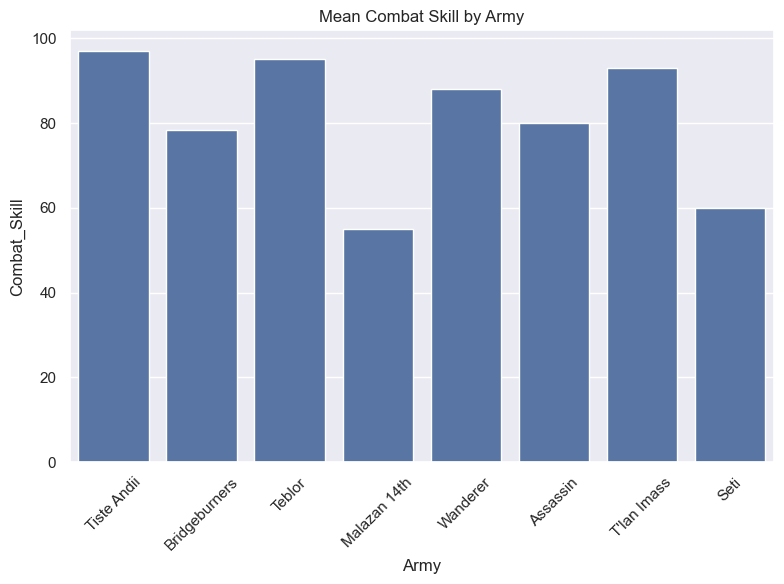

Army
Tiste Andii      97.000000
Teblor           95.000000
T'lan Imass      93.000000
Wanderer         88.000000
Assassin         80.000000
Bridgeburners    78.333333
Seti             60.000000
Malazan 14th     55.000000
Name: Combat_Skill, dtype: float64

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="Army", y="Combat_Skill",
    estimator=np.mean,
    ci=None
)
plt.xticks(rotation=45)
plt.title("Mean Combat Skill by Army")
plt.tight_layout()
plt.show()

df.groupby("Army")["Combat_Skill"].mean().sort_values(ascending=False)

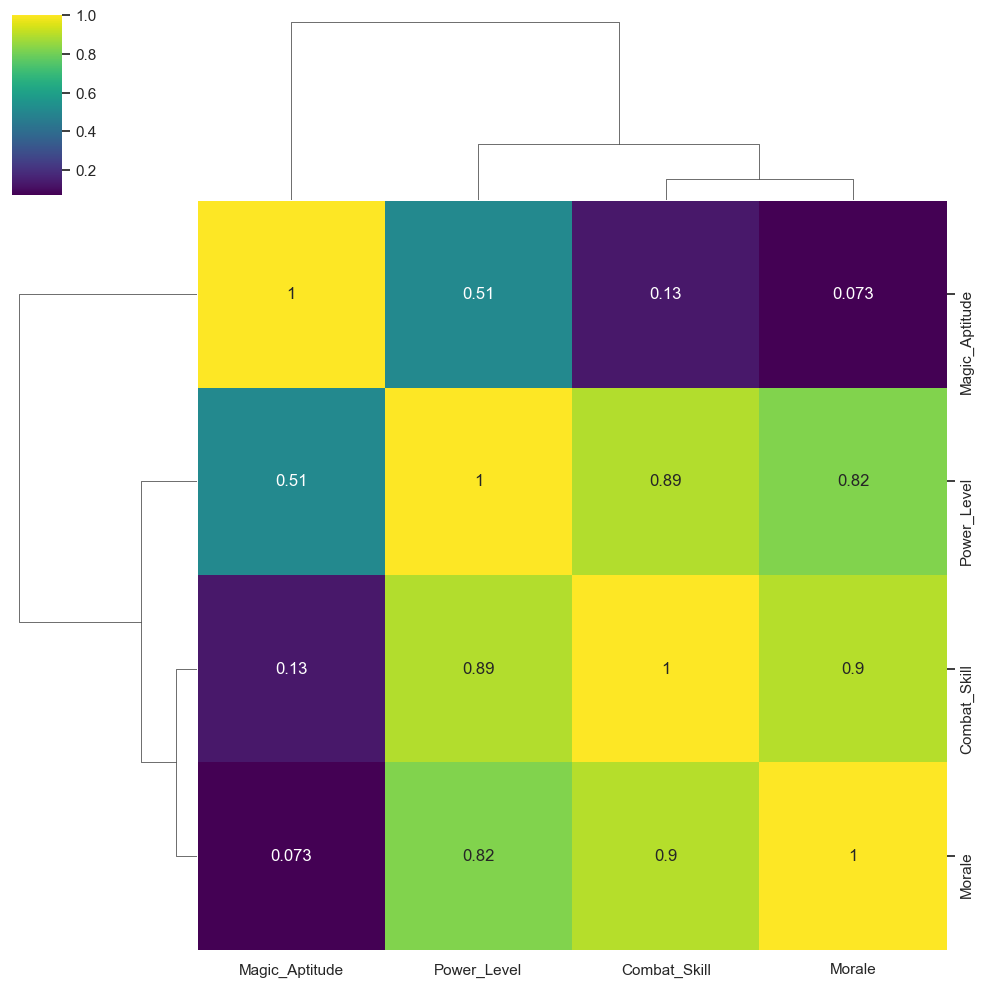

In [52]:
sns.clustermap(df[numeric_cols].corr(), cmap='viridis', 
               annot=True)

Activity: Cluster Interpretation

Text(0.5, 1.02, 'Clustered Correlation Map')

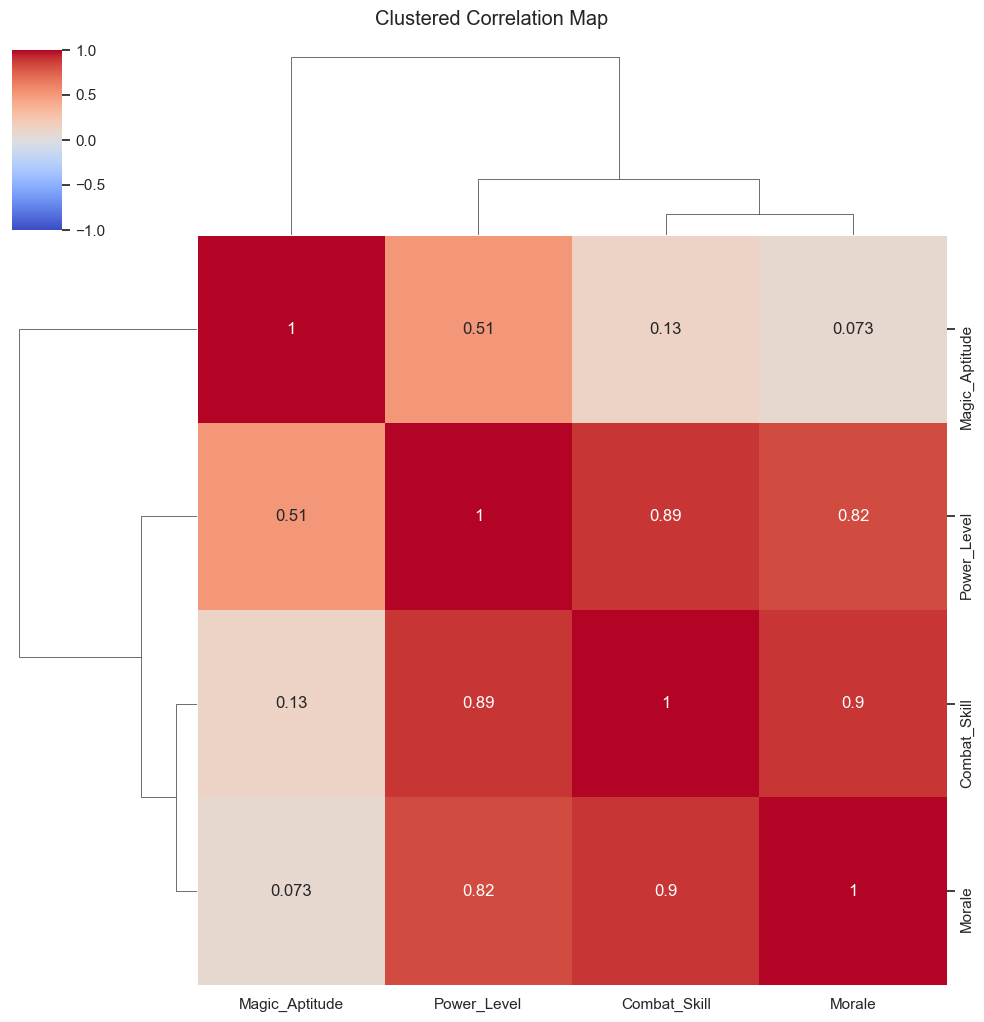

In [55]:
sns.clustermap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1
)
plt.suptitle("Clustered Correlation Map", y=1.02)

Activity: Re-style a Chart

Text(0.5, 1.0, 'Magic vs Combat (viridis palette)')

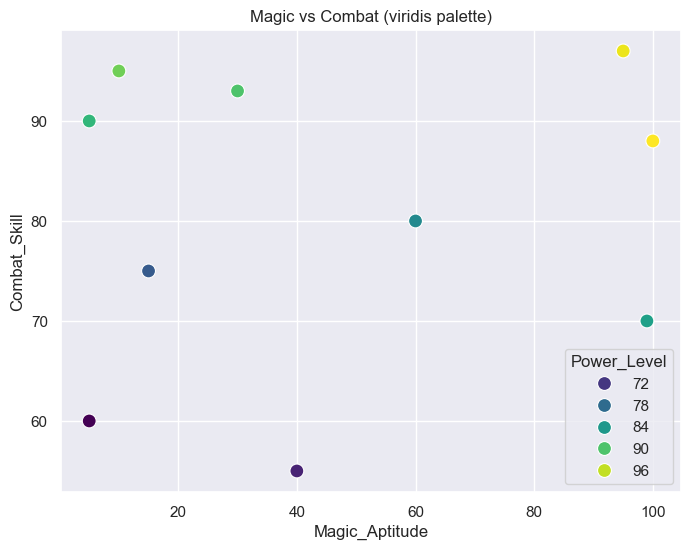

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Magic_Aptitude",
    y="Combat_Skill",
    hue="Power_Level",
    palette="viridis",
    s=100
)
plt.title("Magic vs Combat (viridis palette)")

Activity: Outlier Detection

In [59]:
thr = df[numeric_cols].quantile(0.90)
mask = (df[numeric_cols] >= thr).any(axis=1)
df.loc[mask, ["Character"] + numeric_cols]

,Character,Power_Level,Magic_Aptitude,Combat_Skill,Morale
0,Anomander Rake,98,95,97,88
4,Icarium Lifestealer,99,100,88,85
5,Whiskeyjack,88,5,90,95


Commander Dashboard Example

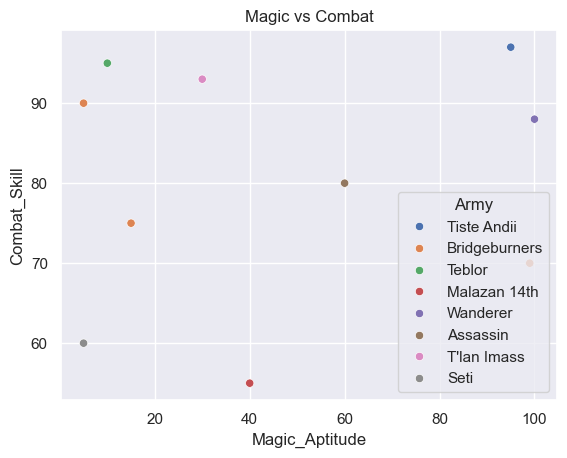

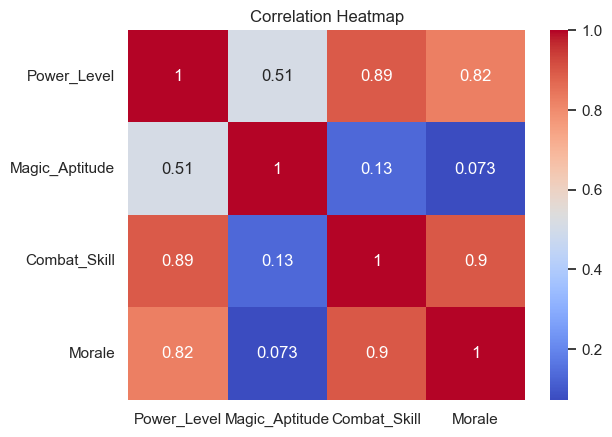

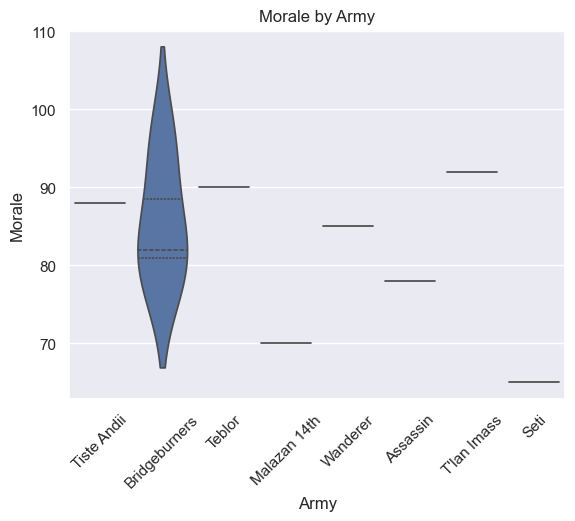

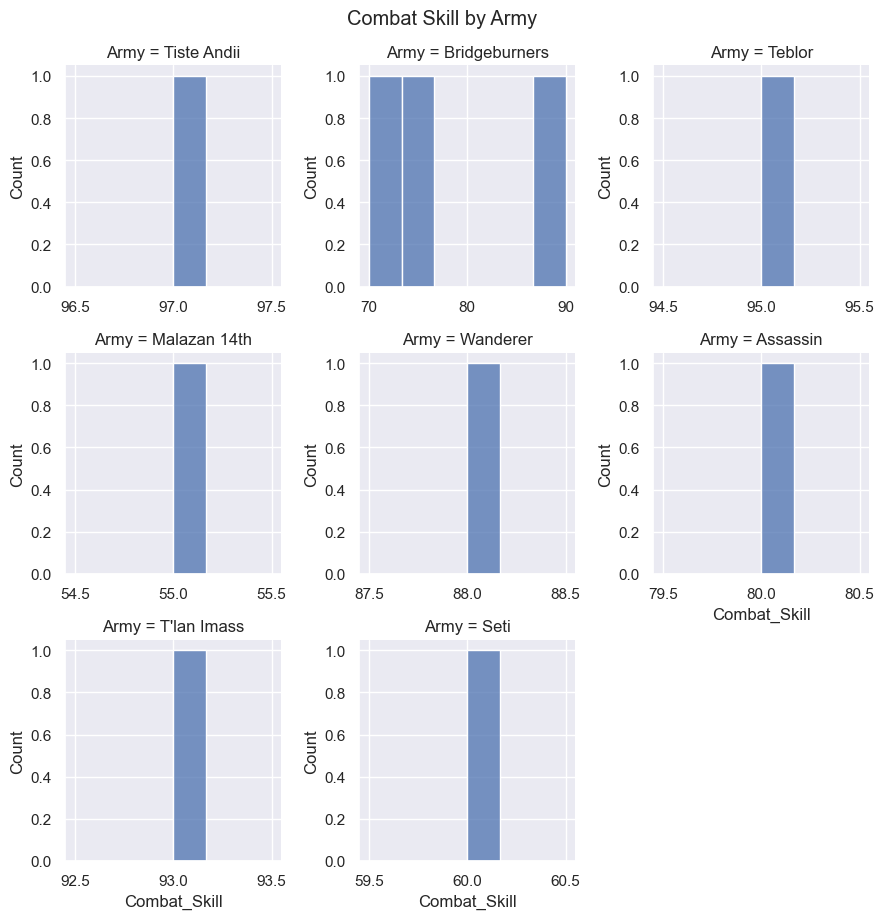

In [60]:
sns.scatterplot(data=df, x="Magic_Aptitude", y="Combat_Skill", hue="Army")
plt.title("Magic vs Combat")
plt.show()

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.violinplot(data=df, x="Army", y="Morale", inner="quartile")
plt.xticks(rotation=45)
plt.title("Morale by Army")
plt.show()

g = sns.FacetGrid(df, col="Army", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Combat_Skill", bins=6)
g.fig.suptitle("Combat Skill by Army", y=1.02)
plt.show()